# Multi-Agent Q-Learning with Repeated Games
Minho Kang

In [7]:
import numpy as np
import logging

import matplotlib.pyplot as plt
from functions.utils.game_env.game_env import GameEnv
from functions.models.multi_agent_naive import MultiAgentNaive
from functions.models.multi_agent_lola import MultiAgentLOLA
from functions.helper.save_games_plot import save_games_plot
import os

In [8]:
# Set a basic game environment
env = GameEnv()
actions = env.actions

# define how many rounds the game should run
n_episodes = 1000

## 1. Naive Multi Agent Q-Learning

In [9]:
# Create naive agents
agent1_maql = MultiAgentNaive(actions)
agent2_maql = MultiAgentNaive(actions)

# Simulate a game
env.simulate_game(agent1=agent1_maql, agent2=agent2_maql, n_episodes=n_episodes)

# Save the simulation's result
save_games_plot(agent1_history=agent1_maql.history, agent2_history=agent2_maql.history, save_dir=os.getcwd() + "/plots/", filename="maql_naive.png", label1="agent1_maql_naive", label2="agent2_maql_naive")

2026-01-02 23:01:51,190 - INFO     - Final actions after training: Agent 1 chooses D, Agent 2 chooses D


## 2. Multi Agent Q-Learning with LOLA

In [10]:
# Create LOLA agents
agent1_lola = MultiAgentLOLA(actions, beta=0.15)
agent2_lola = MultiAgentLOLA(actions, beta=0.15)

# Simulate a game
env.simulate_game(agent1=agent1_lola, agent2=agent2_lola, n_episodes=n_episodes)

# Save the simulation's result
save_games_plot(agent1_history=agent1_lola.history, agent2_history=agent2_lola.history, save_dir=os.getcwd() + "/plots/", filename="maql_lola.png", label1="agent1_maql_lola", label2="agent1_maql_lola")

2026-01-02 23:01:51,247 - INFO     - Final actions after training: Agent 1 chooses C, Agent 2 chooses C


## 3. Opponent Awareness Parameter $\beta$

In [11]:
# Temporarily disable logging message
logging.disable(logging.CRITICAL)

# Run 1,000 repeated games with 100 times
n_simulation = 100

# Set beta range between 0.05 to 0.45
beta_list = np.arange(0.05, 0.5, 0.05)

# Calculate the cooperation rate for each beta
cooperation_dict = {}
for beta in beta_list:
    beta = np.round(beta,2)
    agent1_final_actions = []
    agent2_final_actions = []
    for i in range(n_simulation):
        agent1_lola = MultiAgentLOLA(actions=actions, beta = beta)
        agent2_lola = MultiAgentLOLA(actions=actions, beta = beta)
        env.simulate_game(agent1=agent1_lola, agent2=agent2_lola, n_episodes=n_episodes)
        agent1_final_action = agent1_lola.history[-1]
        agent2_final_action = agent2_lola.history[-1]
        agent1_final_actions.append(agent1_final_action)
        agent2_final_actions.append(agent2_final_action)

    cooperation_count = sum(1 for a1, a2 in zip(agent1_final_actions, agent2_final_actions) if a1 == 1 and a2 == 1)
    cooperation_rate = cooperation_count / n_simulation  # This gives you the proportion
    cooperation_dict[beta] = cooperation_rate

##

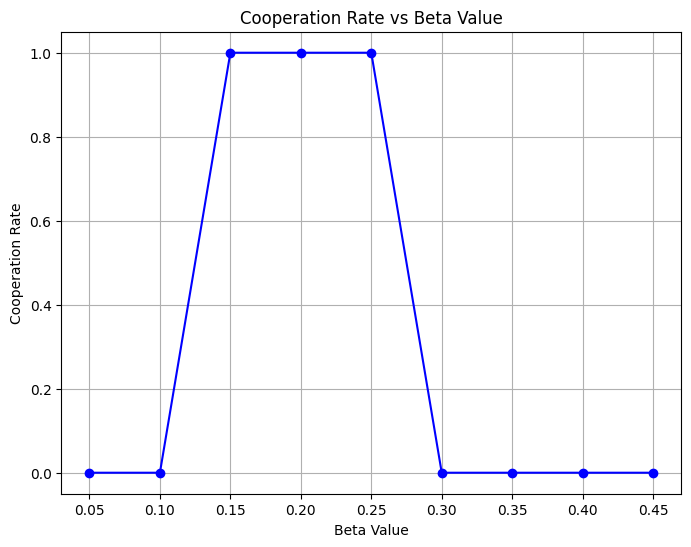

In [12]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(cooperation_dict.keys(), cooperation_dict.values(),
         marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Beta Value')
plt.ylabel('Cooperation Rate')
plt.title('Cooperation Rate vs Beta Value')
plt.grid(True)

# Build save path
plots_dir = os.path.join(os.getcwd(), "plots")
os.makedirs(plots_dir, exist_ok=True)
save_path = os.path.join(plots_dir, "lola_cooperation_vs_beta.png")

# Save and display
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()
